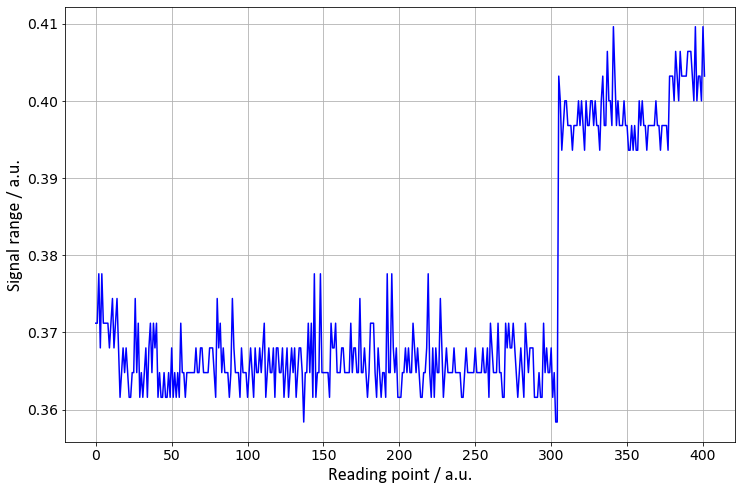

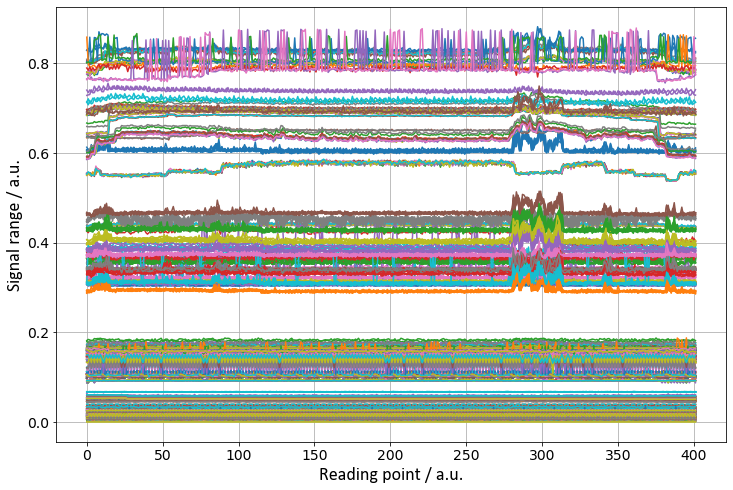

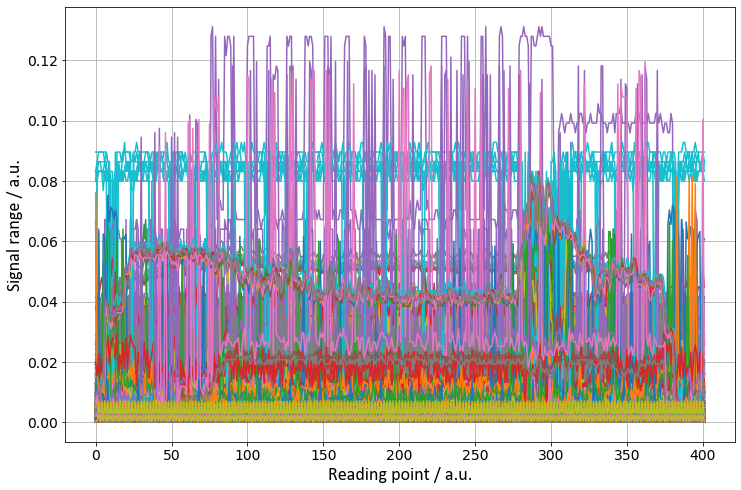

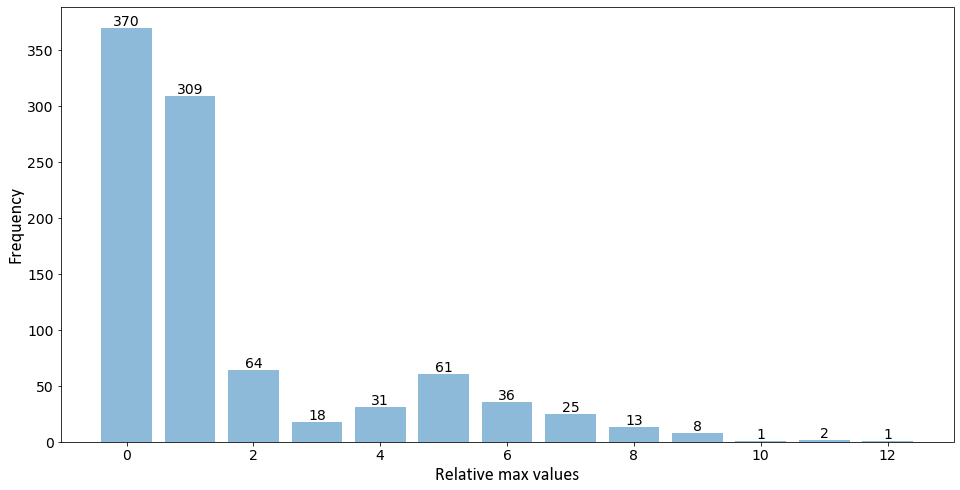

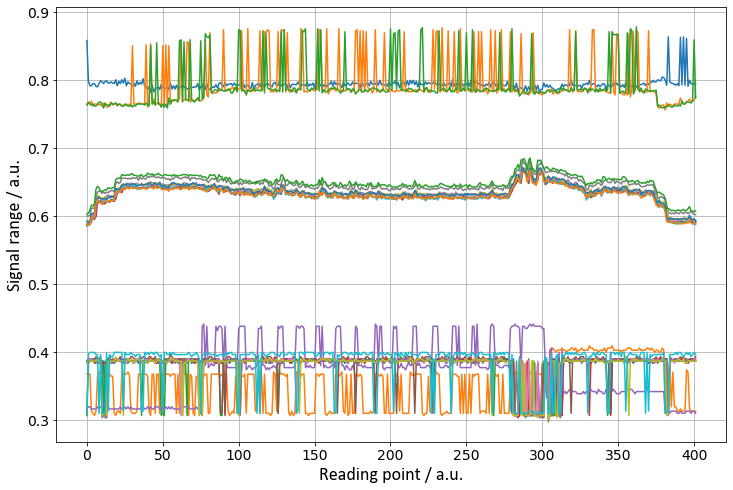

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


A = np.loadtxt('all_processes.txt')
A = A.transpose()


def multiplot(results):
    calibri = {'fontname':'Calibri'}
    plt.figure(figsize = (12, 8))
    plt.grid()
    for i in range (0, len(results)):
        plt.plot(results[i])
    plt.xlabel('Reading point / a.u.', **calibri, fontsize = 18)
    plt.ylabel('Signal range / a.u.', **calibri, fontsize = 18)
    plt.yticks(fontsize = 14)
    plt.xticks(fontsize = 14)


resultall = []
resultallratio = []
minlist = []
ratiolist = []
maxvalue = 0
length = len(A[:, 0])
index = 939 #index 603
x = np.arange(1, length + 1)

calibri = {'fontname':'Calibri'}
plt.figure(figsize = (12, 8))
plt.grid()
plt.plot(A[:, 603], color="blue")
plt.xlabel('Reading point / a.u.', **calibri, fontsize = 18)
plt.ylabel('Signal range / a.u.', **calibri, fontsize = 18)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.savefig("sample_process.svg", bbox_inches="tight")
plt.show()

for i in range(0, index):
    result = []
    result = A[:, i]
    
    minlist = np.append(minlist, min(result))
    minimum = min(result)
    result = [x - minimum for x in result]
    resultall.append(result)
    
    ratio = max(result)
    ratiolist.append(round(ratio, 2))
    if ratio > maxvalue:
        maxvalue = ratio


resultallcopy = A.transpose()
multiplot(resultallcopy)
plt.savefig("all_processes.svg", bbox_inches="tight")
plt.show()
        
resultallbase = np.array(resultall)
multiplot(resultallbase)
plt.savefig("all_processes_base.svg", bbox_inches="tight")
plt.show()

maxvalue2 = max(ratiolist)
ratiolist = [round(x * (1/maxvalue2), 2) for x in ratiolist]
ratiolistunique = np.unique(ratiolist)
ratiolistcount = ratiolistunique
for i in range (0, len(ratiolistunique)):
    ratiolistcount[i] = ratiolist.count(ratiolistunique[i])
y_pos = np.arange(len(ratiolistunique))

calibri = {'fontname':'Calibri'}
plt.figure(figsize = (16, 8))
plt.bar(y_pos, ratiolistcount, align='center', alpha=0.5)
ratiolistunique = np.unique(ratiolist)
for i in range(len(ratiolistcount)):
    plt.text(i, int(ratiolistcount[i]) + 2, int(ratiolistcount[i]), ha = 'center', fontsize = 14)
plt.xlabel('Relative max values', **calibri, fontsize = 18)
plt.ylabel('Frequency', **calibri, fontsize = 18)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()

threshold = 0.6
for i in range(0, index):
    if max(resultall[i]) > threshold * maxvalue:
        resultall[i] = [x + minlist[i] for x in resultall[i]]
        resultallratio.append(resultall[i])

np.savetxt('filtered_processes.txt', resultallratio, fmt='%d')
resultallratio = np.array(resultallratio)
multiplot(resultallratio)
plt.savefig("all_processes_filtered.svg", bbox_inches="tight")
plt.show()
